In [60]:
#importamos librerias
import numpy as np
import pandas as pd # data frames
import os

# Mostrar todos los archivos disponibles en la carpeta de entrada
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spam-csv/spam.csv
/kaggle/input/sms-spam-collection-dataset/__results__.html
/kaggle/input/sms-spam-collection-dataset/__output__.json
/kaggle/input/sms-spam-collection-dataset/custom.css
/kaggle/input/sms-spam-collection-dataset/__results___files/__results___20_0.png
/kaggle/input/sms-spam-collection-dataset/__results___files/__results___21_0.png
/kaggle/input/sms-spam-collection-dataset/__results___files/__results___12_0.png
/kaggle/input/sms-spam-collection-dataset/__results___files/__results___26_0.png


In [ ]:
# cargar el dataset

# Ruta del archivo
ruta_archivo = './dataset/spam.csv'

# Cargar el dataset
df = pd.read_csv(ruta_archivo, encoding='latin-1') # se carga el archivo

# Ver las primeras filas para verificar la carga
print(df.head()) #muestra filas
print(df.info()) # muestra info


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [62]:
# Eliminar columnas innecesarias
df = df[['v1', 'v2']]

# Renombrar las columnas para mayor claridad
df.columns = ['label', 'message']

# Convertir las etiquetas 'ham' y 'spam' a valores numéricos (0 y 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Mostrar las primeras filas para confirmar que todo está bien
print(df.head())


   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir los mensajes en una matriz TF-IDF, de texto a un formato numerico
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['message'])

# Variable dependiente (etiquetas)
y = df['label']

# Ver las dimensiones de las variables procesadas
print("Dimensión de X (mensajes):", X.shape)
print("Dimensión de y (etiquetas):", y.shape)

#5572 mensajes , representado por 5000 caracteristicas relevantes del vocabulario
#filas, columnas

Dimensión de X (mensajes): (5572, 5000)
Dimensión de y (etiquetas): (5572,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Cargar el dataset desde la ruta correcta
df = pd.read_csv('./dataset/spam.csv', encoding='latin-1')

# Renombrar las columnas y eliminar las innecesarias
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df[['label', 'message']]

# Convertir las etiquetas a valores binarios (si es necesario)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Dividir el dataset en X (mensajes) y y (etiquetas de spam)
X = df['message']
y = df['label']

# Dividir el dataset en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir los mensajes en vectores de características usando CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Crear el modelo Naive Bayes
modelo = MultinomialNB()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Precisión del modelo: 0.9838565022421525
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [65]:
print(df.columns)



Index(['label', 'message'], dtype='object')


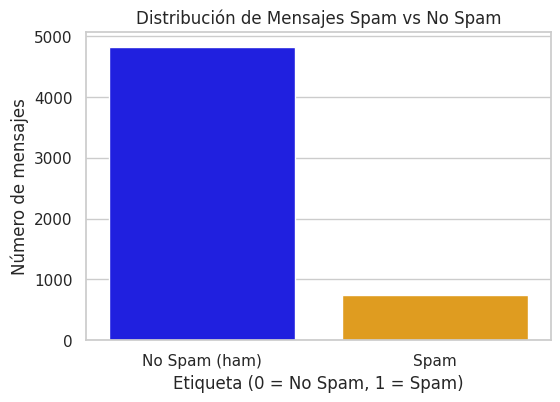

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Contar la cantidad de mensajes spam y ham
conteo_labels = df['label'].value_counts()

# Crear un gráfico de barras para mostrar la distribución
plt.figure(figsize=(6,4))
sns.barplot(x=conteo_labels.index, y=conteo_labels.values, palette=['blue', 'orange'])
plt.title('Distribución de Mensajes Spam vs No Spam')
plt.xlabel('Etiqueta (0 = No Spam, 1 = Spam)')
plt.ylabel('Número de mensajes')
plt.xticks(ticks=[0, 1], labels=['No Spam (ham)', 'Spam'])
plt.show()


In [67]:
print(df.columns)


Index(['label', 'message'], dtype='object')


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Dividir los mensajes en spam y ham
spam_messages = df[df['label'] == 1]['message']
ham_messages = df[df['label'] == 0]['message']

# Vectorizador de palabras
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Combinar los mensajes de spam y ham
all_messages = pd.concat([spam_messages, ham_messages])

# Ajustar el vectorizador a todos los mensajes combinados
vectorizer.fit(all_messages)

# Transformar los mensajes de spam y ham en matrices de características
spam_matrix = vectorizer.transform(spam_messages)
ham_matrix = vectorizer.transform(ham_messages)

# Obtener las palabras más frecuentes en cada conjunto
spam_words = vectorizer.get_feature_names_out()
ham_words = vectorizer.get_feature_names_out()

# Mostrar las palabras más frecuentes en spam
print("Palabras más frecuentes en Spam:")
print(" ".join(spam_words))

print("\nPalabras más frecuentes en Ham:")
print(" ".join(ham_words))


Palabras más frecuentes en Spam:
free good gt just know like ll lt ok ur

Palabras más frecuentes en Ham:
free good gt just know like ll lt ok ur


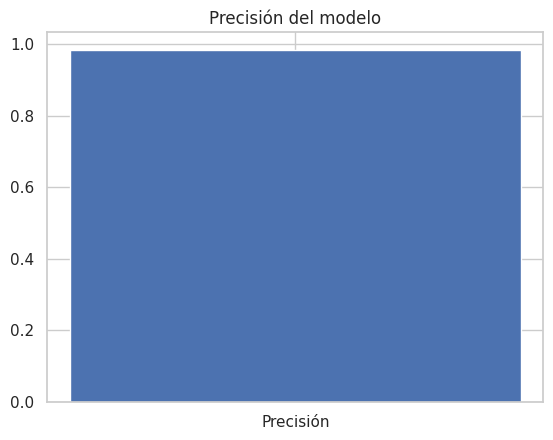

In [69]:

#validar la precision del modelo

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
plt.bar(['Precisión'], [accuracy])
plt.title('Precisión del modelo')
plt.show()


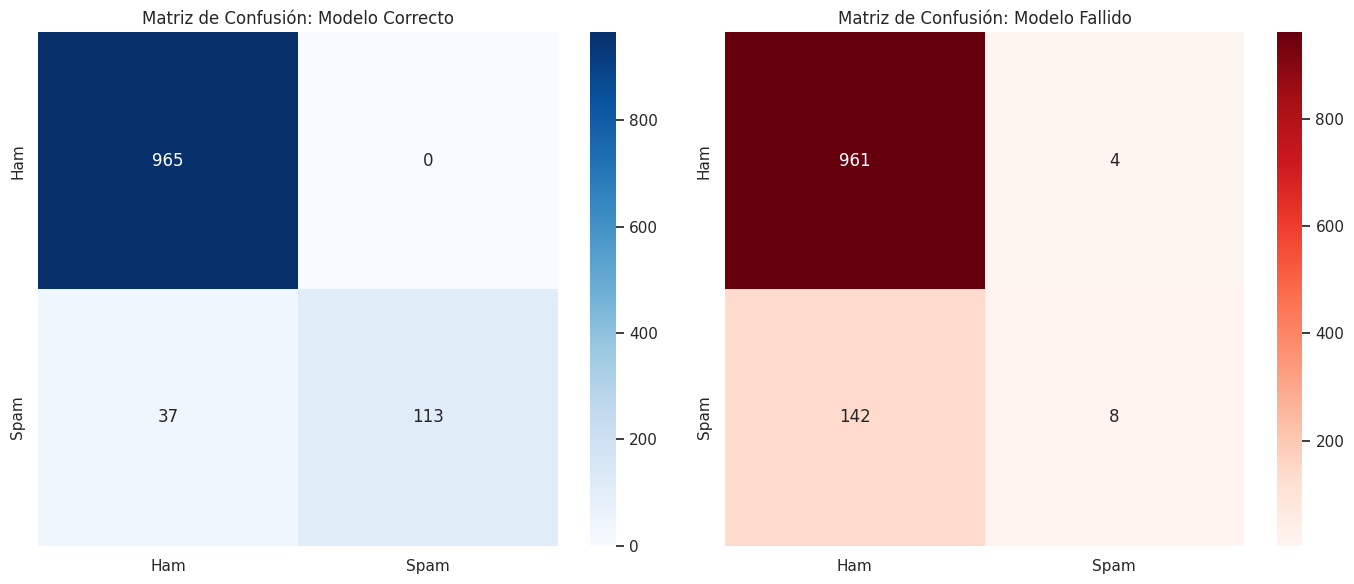

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Crear el vectorizador para el modelo correcto (Naive Bayes)
vectorizer = TfidfVectorizer(max_features=5000)

# Ajustar el vectorizador en los datos de entrenamiento
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Crear el modelo correcto (Naive Bayes)
modelo_correcto = MultinomialNB()
modelo_correcto.fit(X_train_vec, y_train)
y_pred_correct = modelo_correcto.predict(X_test_vec)

# Simular un modelo fallido (Regresión logística con características limitadas)
# Usaremos solo unas pocas características (máximo 10) para el modelo fallido
vectorizer_limited = TfidfVectorizer(max_features=10)  # Limitar el número de características

# Ajustar el vectorizador en los datos de entrenamiento
X_train_limited = vectorizer_limited.fit_transform(X_train)
X_test_limited = vectorizer_limited.transform(X_test)

modelo_fallido = LogisticRegression(max_iter=1000)  # Modelo simple y sin ajustes
modelo_fallido.fit(X_train_limited, y_train)
y_pred_fallido = modelo_fallido.predict(X_test_limited)

# Obtener las matrices de confusión
cm_correct = confusion_matrix(y_test, y_pred_correct)
cm_fallido = confusion_matrix(y_test, y_pred_fallido)

# Crear las gráficas de la matriz de confusión
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Matriz de confusión del modelo correcto
sns.heatmap(cm_correct, annot=True, fmt='d', cmap='Blues', ax=axs[0], 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axs[0].set_title('Matriz de Confusión: Modelo Correcto')

# Matriz de confusión del modelo fallido
sns.heatmap(cm_fallido, annot=True, fmt='d', cmap='Reds', ax=axs[1], 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axs[1].set_title('Matriz de Confusión: Modelo Fallido')

plt.tight_layout()
plt.show()


In [71]:
# Calcular precisión para cada modelo
accuracy_correct = accuracy_score(y_test, y_pred_correct)
accuracy_failed = accuracy_score(y_test, y_pred_fallido)  # Cambié 'y_pred_failed' por 'y_pred_fallido'

# Mostrar métricas detalladas (Precisión, Recall, F1-Score)
print("Métricas del modelo correcto:")
print(classification_report(y_test, y_pred_correct))

print("\nMétricas del modelo fallido:")
print(classification_report(y_test, y_pred_fallido))  # Cambié 'y_pred_failed' por 'y_pred_fallido'

# Mostrar matriz de confusión
cm_correct = confusion_matrix(y_test, y_pred_correct)
cm_failed = confusion_matrix(y_test, y_pred_fallido)  # Cambié 'y_pred_failed' por 'y_pred_fallido'

print("\nMatriz de Confusión del modelo correcto:")
print(cm_correct)

print("\nMatriz de Confusión del modelo fallido:")
print(cm_failed)


Métricas del modelo correcto:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Métricas del modelo fallido:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.67      0.05      0.10       150

    accuracy                           0.87      1115
   macro avg       0.77      0.52      0.51      1115
weighted avg       0.84      0.87      0.82      1115


Matriz de Confusión del modelo correcto:
[[965   0]
 [ 37 113]]

Matriz de Confusión del modelo fallido:
[[961   4]
 [142   8]]


In [72]:
import pandas as pd

# Falsos positivos y negativos
false_positive = X_test[(y_test == 0) & (y_pred_correct == 1)]
false_negative = X_test[(y_test == 1) & (y_pred_correct == 0)]

print("Falsos positivos:")
print(false_positive.head())

print("\nFalsos negativos:")
print(false_negative.head())


Falsos positivos:
Series([], Name: message, dtype: object)

Falsos negativos:
1044    We know someone who you know that fancies you....
683     Hi I'm sue. I am 20 years old and work as a la...
4071    Loans for any purpose even if you have Bad Cre...
3979                                   ringtoneking 84484
1879    U have a secret admirer who is looking 2 make ...
Name: message, dtype: object


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8835 - loss: 0.3570 - val_accuracy: 0.9794 - val_loss: 0.0731
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9950 - loss: 0.0160 - val_accuracy: 0.9803 - val_loss: 0.0757
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.9821 - val_loss: 0.1111
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 7.3550e-04 - val_accuracy: 0.9839 - val_loss: 0.1134
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 3.6068e-04 - val_accuracy: 0.9821 - val_loss: 0.1224
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


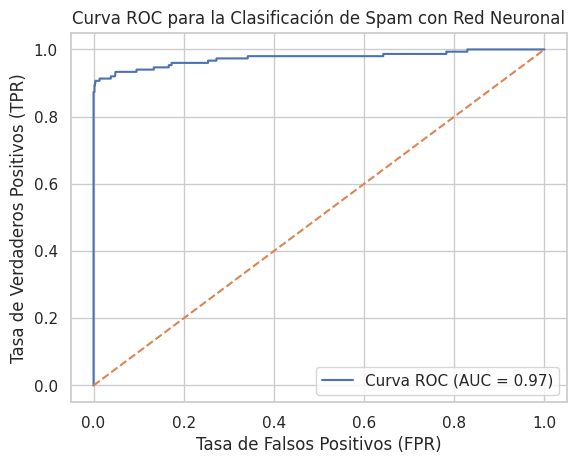

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Cargar el dataset desde la ruta correcta
df = pd.read_csv('./dataset/spam.csv', encoding='latin-1')

# Seleccionar y renombrar las columnas relevantes
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convertir las etiquetas a valores numéricos
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Dividir el dataset en X (mensajes) y y (etiquetas)
X = df['message']
y = df['label']

# Dividir el dataset en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir los mensajes en vectores de características usando CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Convertir a matrices densas
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

# Construcción del modelo de red neuronal
model_nn = Sequential()
model_nn.add(Dense(128, input_shape=(X_train_vec.shape[1],), activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_nn.fit(X_train_vec, y_train, epochs=5, batch_size=32, validation_data=(X_test_vec, y_test))

# Obtener las probabilidades de predicción para la clase "spam"
y_prob = model_nn.predict(X_test_vec)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para la Clasificación de Spam con Red Neuronal')
plt.legend(loc='lower right')
plt.show()

#codigo de red neuronal

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


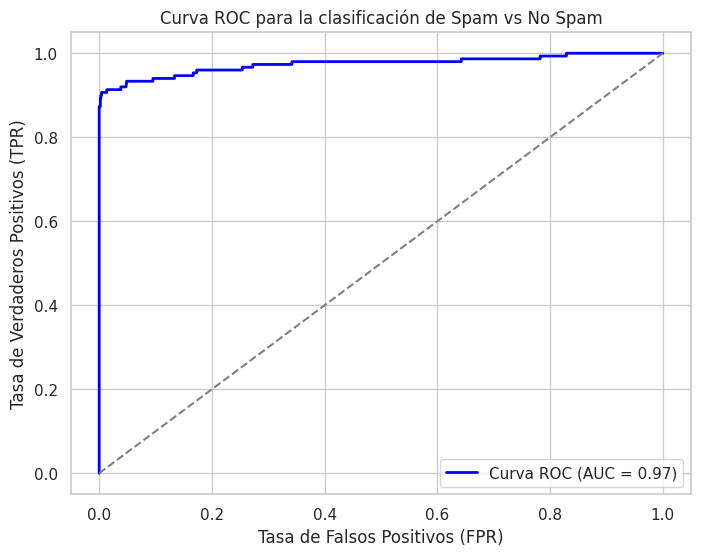

AUC (Área Bajo la Curva): 0.9743143350604491


In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para la clase "spam"
y_prob = model_nn.predict(X_test_vec)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de no discriminación
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para la clasificación de Spam vs No Spam')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Imprimir el AUC
print(f'AUC (Área Bajo la Curva): {roc_auc}')


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


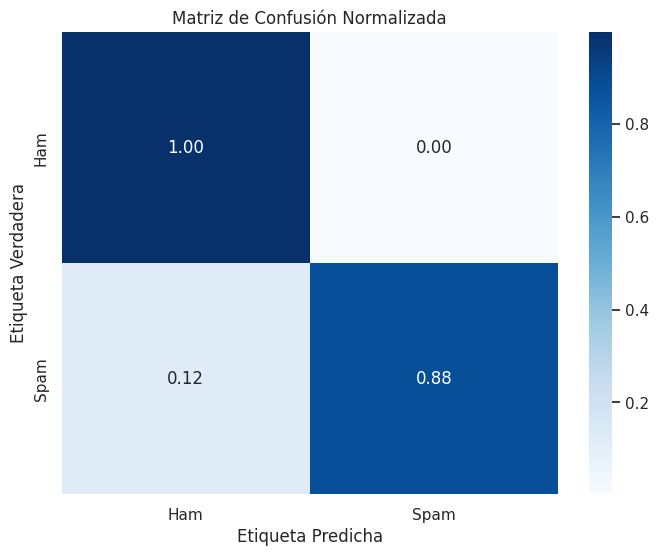

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Realizar predicciones con tu modelo
y_pred = (model_nn.predict(X_test_vec) > 0.5).astype("int32")

# Crear la matriz de confusión
conf_matrix_correct = confusion_matrix(y_test, y_pred)

# Normalizar la matriz de confusión
cm_normalized = conf_matrix_correct.astype('float') / conf_matrix_correct.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt='.2f', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Matriz de Confusión Normalizada")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Dividir el dataset en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Vectorización con CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Imprimir el tipo de datos y el tamaño de las matrices resultantes
print(f'Tipo de X_train_vect: {type(X_train_vect)}')
print(f'Tamaño de X_train_vect: {X_train_vect.shape}')
print(f'Tipo de X_test_vect: {type(X_test_vect)}')
print(f'Tamaño de X_test_vect: {X_test_vect.shape}')


Tipo de X_train_vect: <class 'scipy.sparse._csr.csr_matrix'>
Tamaño de X_train_vect: (4457, 7735)
Tipo de X_test_vect: <class 'scipy.sparse._csr.csr_matrix'>
Tamaño de X_test_vect: (1115, 7735)


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convertir los datos dispersos a arreglos densos
X_train_array = X_train_vect.toarray()
X_test_array = X_test_vect.toarray()

# Definir el modelo de red neuronal
model_nn = Sequential()
model_nn.add(Dense(128, activation='relu', input_dim=X_train_array.shape[1]))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model_nn.fit(X_train_array, y_train, epochs=5, batch_size=32, validation_data=(X_test_array, y_test))

# Evaluar el modelo
y_pred = (model_nn.predict(X_test_array) > 0.5).astype("int32")

# Mostrar la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9098 - loss: 0.3759 - val_accuracy: 0.9803 - val_loss: 0.0896
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9927 - loss: 0.0367 - val_accuracy: 0.9821 - val_loss: 0.0728
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9989 - loss: 0.0101 - val_accuracy: 0.9812 - val_loss: 0.0797
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9812 - val_loss: 0.0857
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9803 - val_loss: 0.0913
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Matriz de Confusión:
[[965   0]
 [ 22 128]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.9

In [78]:
loss, accuracy = model_nn.evaluate(X_test_vect.toarray(), y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0514
Precisión en el conjunto de prueba: 0.9803


In [79]:
history = model_nn.fit(X_train_array, y_train, epochs=5, batch_size=32, validation_data=(X_test_array, y_test))


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9794 - val_loss: 0.0974
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9794 - val_loss: 0.0999
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 8.5412e-04 - val_accuracy: 0.9794 - val_loss: 0.1038
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 5.7368e-04 - val_accuracy: 0.9794 - val_loss: 0.1062
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 4.3461e-04 - val_accuracy: 0.9803 - val_loss: 0.1086


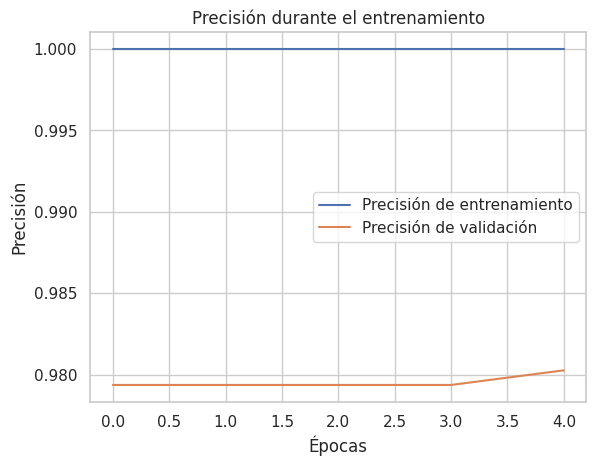

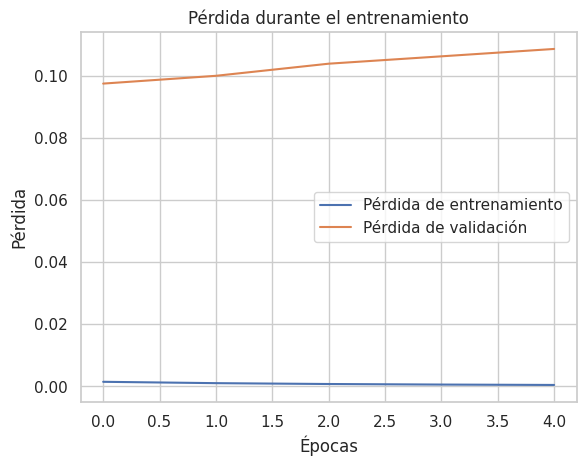

In [80]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


Forma de y_test antes de aplanar: (1115,)
Forma de y_test después de aplanar: (1115,)
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Forma de y_test: (1115,)
Forma de y_prob: (1115,)


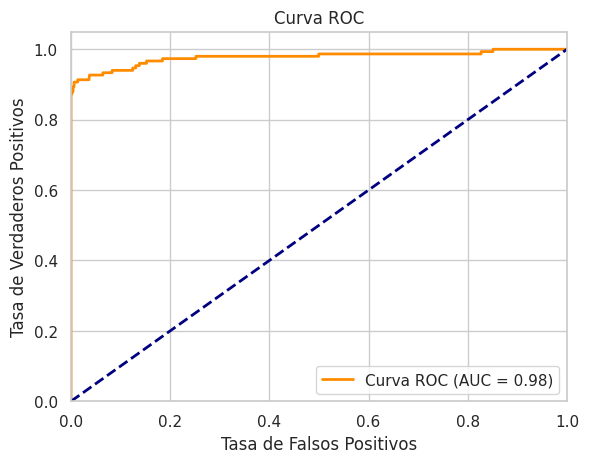

In [81]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Asegúrate de que df tiene las columnas 'message' y 'label'
# Dividir el dataset en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Vectorización con CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Verificar la forma de y_test antes de aplanar
print("Forma de y_test antes de aplanar:", y_test.shape)

# Aplanar y_test si es necesario (en caso de que sea una lista o DataFrame)
y_test = np.array(y_test).ravel()

# Verificar la forma después de aplanar
print("Forma de y_test después de aplanar:", y_test.shape)

# Obtener las probabilidades de predicción para la clase "spam"
y_prob = model_nn.predict(X_test_vect)

# Asegurarse de que y_prob es un vector unidimensional
y_prob = y_prob[:, 0]  # Esto extrae la probabilidad para la clase positiva

# Verificar las formas de y_test y y_prob
print("Forma de y_test:", y_test.shape)
print("Forma de y_prob:", y_prob.shape)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


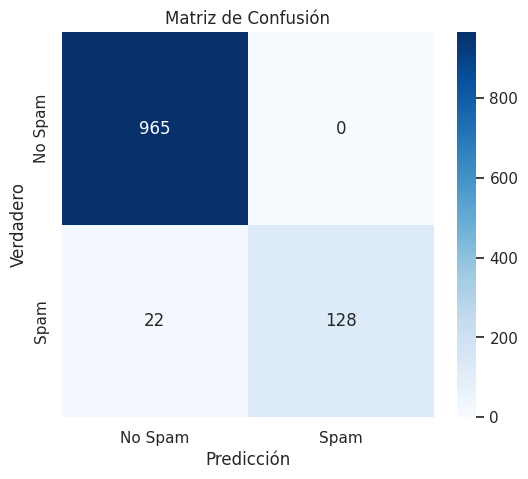

              precision    recall  f1-score   support

     No Spam       0.98      1.00      0.99       965
        Spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [82]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo
y_pred = model_nn.predict(X_test_vec)
y_pred = (y_pred > 0.5)  # Convertir probabilidades a clases (spam/no spam)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Spam', 'Spam'], yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['No Spam', 'Spam'])
print(report)


In [83]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ejemplo de datos de entrenamiento (reemplaza esto con tus propios datos)
# 'X' son los textos de ejemplo y 'y' son las etiquetas (0 = ham, 1 = spam)
X = ["mensaje de ejemplo 1", "mensaje de ejemplo 2", "mensaje de spam", "mensaje ham"]  # Tus mensajes aquí
y = [0, 0, 1, 0]  # 0 = Ham, 1 = Spam

# Crear y entrenar el vectorizador
vectorizer = TfidfVectorizer()
X_vectorizado = vectorizer.fit_transform(X)  # Ajusta el vectorizador al conjunto de entrenamiento

# Crear y entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X_vectorizado, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()  # O el modelo que estés usando
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba para ver la precisión
y_pred = model.predict(X_test)
print(f'Precisión del modelo: {accuracy_score(y_test, y_pred)}')

# Guardar el vectorizador y el modelo entrenado
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('modelo.pkl', 'wb') as f:
    pickle.dump(model, f)


Precisión del modelo: 1.0


In [84]:
import os
os.listdir('.')



['modelo.pkl',
 'vectorizer.pkl',
 '.virtual_documents',
 'vectorizador.pkl',
 'modelo_spam.pkl']

In [ ]:
import pickle

# Cargar el modelo y el vectorizador
with open('modelo.pkl', 'rb') as f:
    modelo = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizador = pickle.load(f)

print("¡Modelo y vectorizador cargados correctamente!")


¡Modelo y vectorizador cargados correctamente!


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pickle

# Cargar el dataset con el encoding adecuado
df = pd.read_csv("./dataset/spam.csv", encoding='latin-1')

# Renombrar columnas relevantes y eliminar columnas innecesarias
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]

# Convertir etiquetas a 0 y 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Separar características y etiquetas
X = df['message']
y = df['label']

# Vectorización del texto
vectorizador = CountVectorizer()
X_vectorizado = vectorizador.fit_transform(X)

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vectorizado, y)

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

# Guardar el modelo y el vectorizador
with open('modelo_spam.pkl', 'wb') as f:
    pickle.dump(modelo, f)
with open('vectorizador.pkl', 'wb') as f:
    pickle.dump(vectorizador, f)

print("✅ Modelo y vectorizador guardados exitosamente.")


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       985
           1       0.95      0.98      0.97       945

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930

✅ Modelo y vectorizador guardados exitosamente.


In [88]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display
import ipywidgets as widgets

# Cargar el modelo y el vectorizador
with open('modelo_spam.pkl', 'rb') as f:
    modelo = pickle.load(f)
with open('vectorizador.pkl', 'rb') as f:
    vectorizador = pickle.load(f)

# Crear una función para predecir si un mensaje es Spam o Ham
def predecir(texto):
    datos_transformados = vectorizador.transform([texto])
    prediccion = modelo.predict(datos_transformados)
    return 'Spam' if prediccion[0] == 1 else 'Ham'

# Crear interfaz con widgets
entrada_texto = widgets.Textarea(
    value='',
    placeholder='Escribe el mensaje que deseas analizar...',
    description='Mensaje:',
    layout=widgets.Layout(width='80%', height='100px')
)
boton_predecir = widgets.Button(
    description='Predecir',
    button_style='success'
)
salida = widgets.Output()

def al_hacer_click(b):
    with salida:
        salida.clear_output()
        mensaje = entrada_texto.value
        resultado = predecir(mensaje)
        print(f"📧 El mensaje es: {resultado}")

boton_predecir.on_click(al_hacer_click)

display(entrada_texto, boton_predecir, salida)


Textarea(value='', description='Mensaje:', layout=Layout(height='100px', width='80%'), placeholder='Escribe el…

Button(button_style='success', description='Predecir', style=ButtonStyle())

Output()